In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Ensure the file path is correct and the file exists
ds = pd.read_csv("advertising.csv")  # Update the path to include the 'datasets' folder

# Display the first few rows to confirm successful loading
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
ds.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

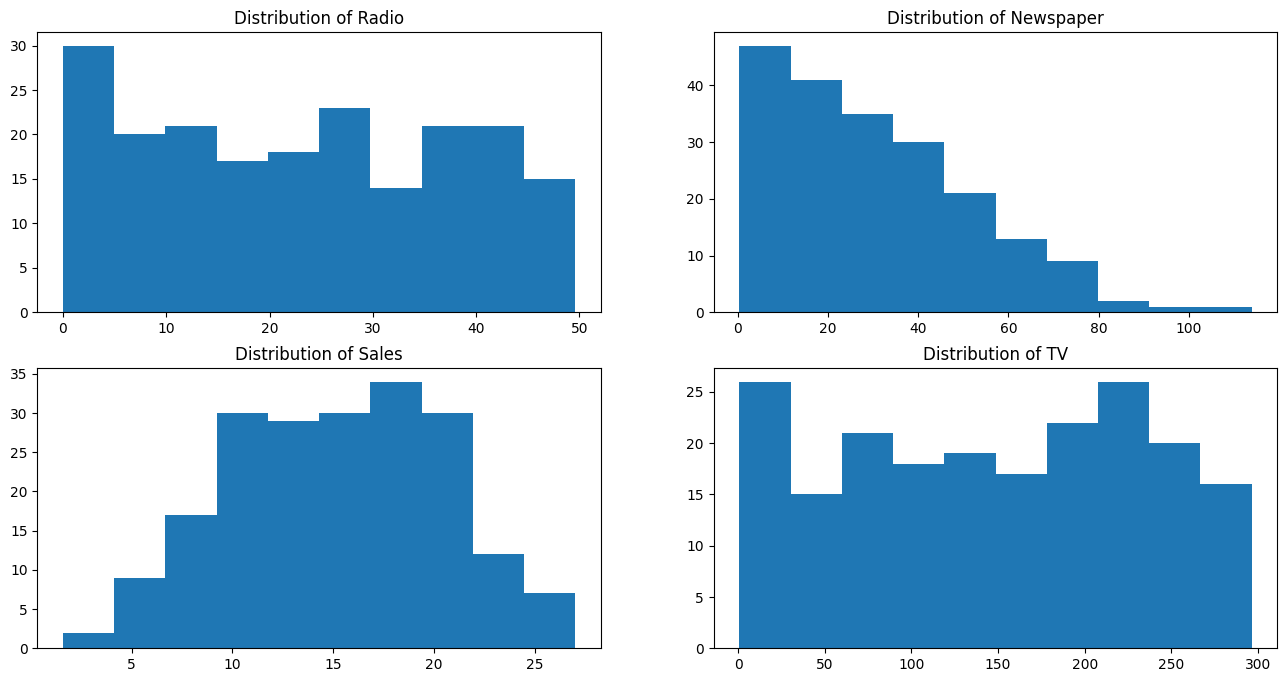

In [ ]:
fig,axes=plt.subplots(2, 2, figsize=(16,8))
axes[0,0].set_title("Distribution of Radio")
axes[0,0].hist(ds["Radio"])

axes[0,1].set_title("Distribution of Newspaper")
axes[0,1].hist(ds["Newspaper"])

axes[1,0].set_title("Distribution of Sales")
axes[1,0].hist(ds["Sales"])

axes[1,1].set_title("Distribution of TV")
axes[1,1].hist(ds["TV"])

In [ ]:
ds.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
ds.fillna(ds.mean(),inplace=True)

In [ ]:
ds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
ds=ds.dropna()

In [13]:
df2=pd.read_csv("Mall_Customers - Mall_Customers.csv")

In [14]:
df_combined = pd.concat([ds, df2], axis=0)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume ds is your DataFrame
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)
ds_scaled = pd.DataFrame(ds_scaled, columns=ds.columns)

# Split the dataset into training and testing sets
X = ds_scaled.drop('Radio', axis=1)
y = ds_scaled['Radio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomForestRegressor for regression task
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.41053814138818


Mean Squared Error: 0.41053814138818
Mean Absolute Error: 0.5298050466847407
R² Score: 0.5949793934807868


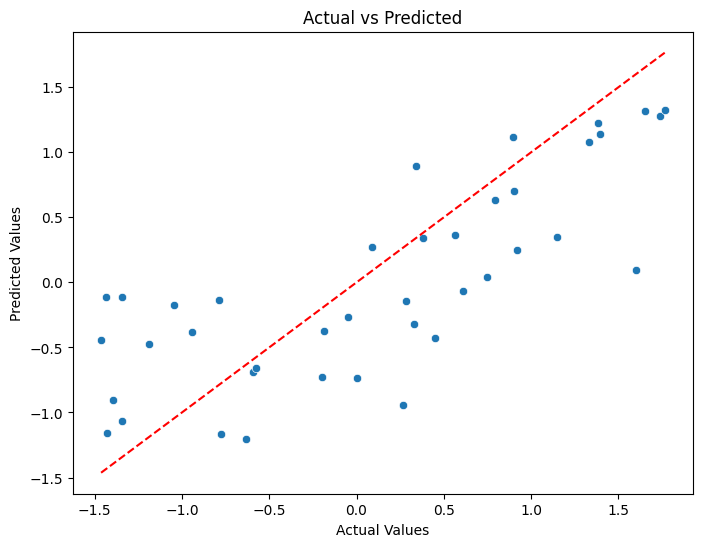

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the dataset
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)
ds_scaled = pd.DataFrame(ds_scaled, columns=ds.columns)

# Split features and target
X = ds_scaled.drop('Radio', axis=1)
y = ds_scaled['Radio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict and evaluate
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Visualize predictions vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.show()
